In [6]:
# !pip install pandas numpy nltk scikit-learn

Now we will import several Python libraries that will be used for natural language processing and machine learning tasks:

1. `pandas` (imported as pd) is a library for data manipulation and analysis.

1. `numpy` (imported as np) is a library for numerical computing in Python.

1. `re` is the built-in Python library for regular expressions, which is used to perform pattern matching and text manipulation.

1. `nltk` is the Natural Language Toolkit, a library for working with human language data.

1. `nltk.corpus` is a sub-library within nltk that provides access to various language corpora (i.e. collections of texts).

1. `stopwords` is a collection of common English stop words (i.e. words that are often removed from text because they do not carry much meaning).

1. `nltk.download('punkt')` downloads the Punkt tokenizer, which is a pre-trained algorithm for splitting text into sentences and words.

1. `CountVectorizer` is a class from the scikit-learn library that is used to convert a collection of text documents into a matrix of token counts.

1. `TfidfTransformer` is another class from scikit-learn that is used to convert the matrix of token counts into a matrix of term frequencies times inverse document frequency (tf-idf) values.

1. `train_test_split` is a function from scikit-learn that is used to split data into training and testing sets.

1. `LogisticRegression` is a class from scikit-learn that is used to fit a logistic regression model to data.

1. `accuracy_score` is a function from scikit-learn that is used to compute the accuracy of a classification model.

In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


No we load a dataset into a pandas DataFrame object and displaying the first few rows of the data using the head() function to get know about dataset.

The Sentiment140 is a dataset for sentiment analysis tasks, especially for binary classification of positive and negative sentiment. The dataset consists of 1.6 million tweets, each labeled with either 'positive' or 'negative' sentiment. The tweets were collected using the Twitter API and cover the period from April to June 2009.

Each tweet in the dataset is represented as a single line of text, with the following fields separated by commas:

- target: the sentiment of the tweet (0 = negative, 2 = neutral, 4 = positive)
- id: the ID of the tweet
- date: the date and time the tweet was created
- flag: a query label used to filter out spam tweets
- user: the username of the Twitter user who posted the tweet
- text: the text content of the tweet

For sentiment analysis tasks, the `target` field is typically used as the target variable, with `0` indicating ***negative*** sentiment and `4` indicating positive ***sentiment***. The `text` field is used as the input data, with machine learning models trained to predict the sentiment label based on the text content of the tweets.

In [8]:
# Load the dataset
df = pd.read_csv('Sentiment140.csv', encoding='latin-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'text'])
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Now we will perform text preprocessing on the text data in a pandas DataFrame object named `df`. The preprocessing steps include removing URLs and usernames, removing punctuation, converting text to lowercase, removing stopwords, and tokenizing the text using regular-expression and removing stopwords. We also tokenizes the text into a list of words using the `word_tokenize()` function from the `nltk` library.

In [9]:
# Preprocess the data
# import nltk
# nltk.download('stopwords')
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove usernames
    text = re.sub(r'@\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words] #Removes token from the 'token list' that are stopwords
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

df['text'] = df['text'].apply(preprocess_text)

Now, we will be splitting the dataset into training and testing sets for use in our machine learning model. Specifically, we're splitting the text data `df['text']` into training and testing sets `X_train` and `X_test`, and splitting the target data `df['target']`, which contains the sentiment labels into training and testing sets `y_train` and `y_test`, respectively.

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

Now we will create a bag-of-words (BoW) representation of the text data using the `CountVectorizer()` class from the `sklearn.feature_extraction.text` module. A bag-of-words model represents text as a matrix of word counts, where each row corresponds to a document and each column corresponds to a distinct word in the corpus.

In [11]:
# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

Now we will apply term frequency-inverse document frequency `tf-idf` weighting to the bag-of-words (BoW) representation of the text data created in the previous step. Tf-idf is a numerical statistic that reflects how important a word is to a document in a corpus. It is calculated by multiplying the term frequency (i.e., how often a word appears in a document) by the inverse document frequency (i.e., how often the word appears in the entire corpus).

In [12]:
# Apply tf-idf weighting to the bag-of-words representation
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

Let's train a logistic regression model on the `tf-idf` weighted bag-of-words (BoW) representation of the training data.

In [13]:
# Train a logistic regression model on the tf-idf weighted bag-of-words representation
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

Using the trained logistic regression model (`clf`) to predict the sentiment labels for the test data.

In [14]:
# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

Accuracy of our model

In [15]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 78.4840625%


Using `wordcloud` to generate wordcloud of the most common words in the tweets. The size of each word in the wordcloud represents the frequency of the word in the tweets.

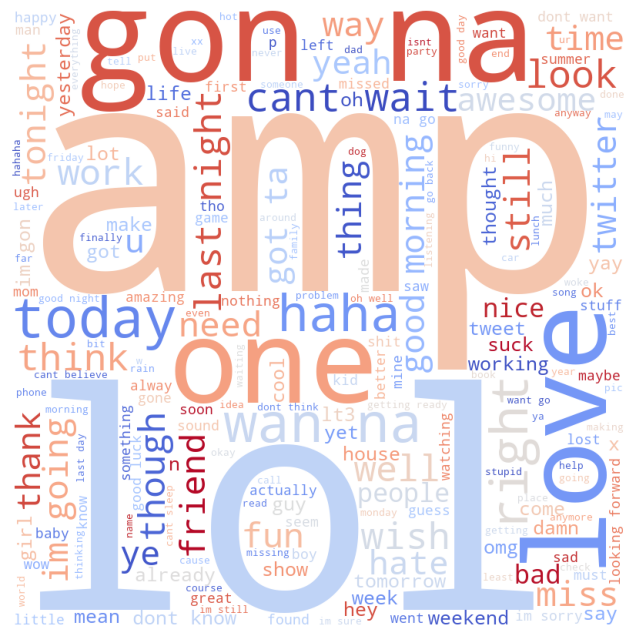

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the tweets into a single string
all_tweets = ' '.join(df['text'].tolist())

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='coolwarm').generate(all_tweets)

# Display the wordcloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now we will generate and display a heatmap of the sentiment of tweets over time. Here, each row of the heatmap represents a date, and each column represents a sentiment. The color of each cell represents the number of tweets for that sentiment on that date. The colormap used in the plot goes from blue to red, with blue representing a smaller count and red representing a larger count.

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


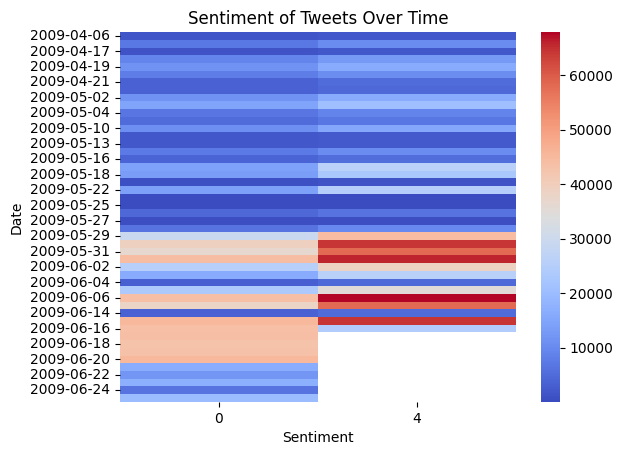

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column to the DataFrame with the datetime information
df['datetime'] = pd.to_datetime(df['date'])

# Group the tweets by date and sentiment
df_heatmap = df.groupby([df['datetime'].dt.date, 'target']).size().unstack()

# Create a heatmap
sns.heatmap(df_heatmap, cmap='coolwarm')
plt.title('Sentiment of Tweets Over Time')
plt.xlabel('Sentiment')
plt.ylabel('Date')
plt.show()

Let's computes the mean and standard deviation of the sentiment scores of the tweets in the `df` DataFrame, then identifies any data points (i.e., tweets) that are more than 3 standard deviations away from the mean and stores them in a new DataFrame called outliers.

Then, lets create a bar chart of the sentiment scores using `plt.bar()`, where the sentiment scores are plotted on the *x-axis* and the counts of each sentiment score are plotted on the *y-axis*. The `counts.index` and `counts.values` are used to retrieve the *x* and *y* values for the bar chart. The `plt.ylim()` function is used to set the y-axis limits of the plot. The `plt.xticks()` function is used to set the x-axis labels to "Negative" and "Positive".

Finally, lets add a horizontal line to the plot using `plt.axhline()` to indicate the outlier threshold that was calculated earlier. This line is plotted in red with a dashed line style. The resulting plot can be used to visualize the distribution of sentiment scores in the `df` DataFrame, with outliers highlighted for further investigation.

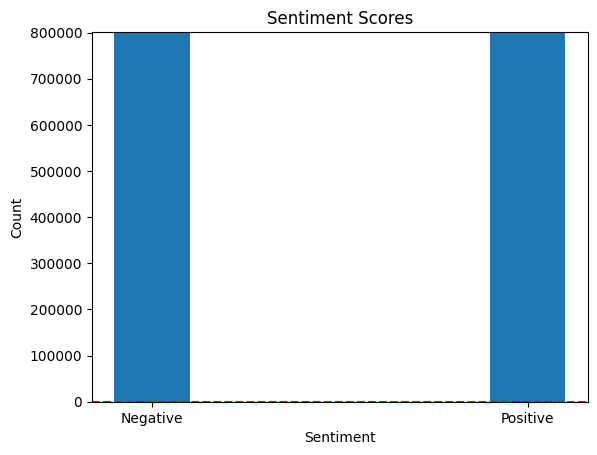

In [18]:
# Compute the mean and standard deviation of the sentiment scores
mean_sentiment = df['target'].mean()
std_sentiment = df['target'].std()

# Identify any data points that are more than 3 standard deviations away from the mean
outlier_threshold = mean_sentiment + 3*std_sentiment
outliers = df[df['target'] > outlier_threshold]

# Plot a bar chart of the sentiment scores
counts = df['target'].value_counts().sort_index() #sort index is used to sort index labels of a dataframe
plt.bar(counts.index, counts.values)
plt.title('Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.ylim(0, counts.values.max()+1000)
plt.xticks([0, 4], ['Negative', 'Positive'])
plt.axhline(y=outlier_threshold, color='red', linestyle='--')
plt.show()
# Since horizontal red line coincides with the x axis this means 
# there are no outliers based on the calculated threshold and all the 
# data points fall within normal range of values




This code block prompts the user to input a start and end timestamp in the format of `YYYY-MM-DD HH:MM:SS`. It then filters the original dataframe based on the timestamps using a boolean mask. The filtered dataframe is used to plot a bar chart of the sentiment scores within the specified time range. The sentiment scores are represented on the x-axis, and the count of tweets with each sentiment score is represented on the y-axis. The plot is titled "Sentiment Scores" and has labeled axes.

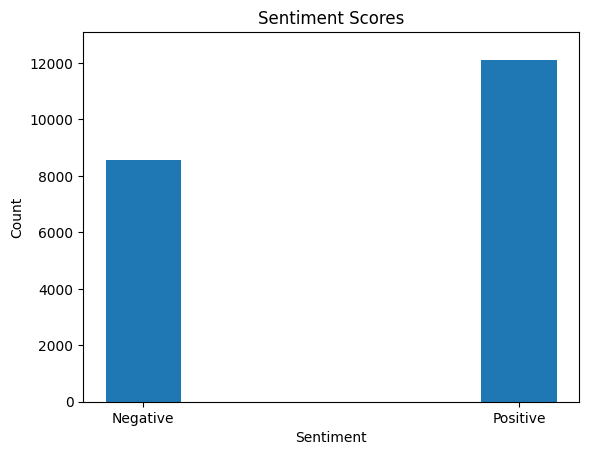

In [19]:
# These two timestamps are given as input data 

# Enter the start timestamp (YYYY-MM-DD HH:MM:SS):  2009-04-06 22:19:45
# Enter the end timestamp (YYYY-MM-DD HH:MM:SS):  2009-04-07 22:19:45



# Get the start and end timestamps from the user
start_timestamp = pd.Timestamp(input('Enter the start timestamp (YYYY-MM-DD HH:MM:SS): '))
end_timestamp = pd.Timestamp(input('Enter the end timestamp (YYYY-MM-DD HH:MM:SS): '))

# Filter the dataset based on the timestamp
mask = (df['datetime'] >= start_timestamp) & (df['datetime'] <= end_timestamp)
filtered_df = df.loc[mask]

# Plot a bar chart of the sentiment scores
counts = filtered_df['target'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.title('Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.ylim(0, counts.values.max()+1000)
plt.xticks([0, 4], ['Negative', 'Positive'])
plt.show()

This code takes user input and performs the same preprocessing and vectorization steps that were used to train the sentiment analysis model. It then uses the trained model to predict the sentiment of the user's input, which is either 0 for negative, 2 for neutral, or 4 for positive. The code then prints out the corresponding sentiment label for the predicted sentiment value.

In [20]:
#"I love cookies" is given as user input
user_input = input()
preprocessed_input = preprocess_text(user_input)
vectorized_input = vectorizer.transform([preprocessed_input])
tfidf_input = tfidf_transformer.transform(vectorized_input)
sentiment = clf.predict(tfidf_input)[0] #clf is an instance of logistic regression model

if sentiment == 0:
    print("Negative Statement")
elif sentiment == 2:
    print("Nuetral Statement")
elif sentiment == 4:
    print("Positive Statement")
else:
    print("Unknow value recieved!")

Positive Statement
